<a href="https://colab.research.google.com/github/DurantZhou/ISYS5002-2024-S1-A2/blob/main/Business_Report_Group_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction



#Overview

The Australian Energy Dataset analysis is the focus of this notebook. In order to gain insight into Australia's energy consumption patterns across various states and fuel types, we will concentrate on answering specific questions.

Our goal is to obtain insights that help guide policy decisions, resource allocation, and sustainable energy management practices in Australia through meticulous research and visualization.

In order to shed light on the dynamics of energy use in Australia, let's delve into the data and extract insightful information.

##Necessary Data Levels and their descriptions:


* Year: the data is for energy consumtion by 2008-2009 and 2021-2022.
* State: Energy consumsion for 5 states are given.
*   Coal (PJ):Coal consumtion for each state in petajoule (PJ) are given
*   Oil (PJ):Oil consumtion for each state in petajoule (PJ) are given


*   Gas (PJ):Gas consumtion for each state in petajoule (PJ) are given

*   Renewables (PJ):Renewables consumtion for each state in petajoule (PJ) are given
*   Population: Total no of population for each state are given.


*  GSP ($ million): Grid Supply Point (GSP) is given in million

*   Total Energy (GJ): Total Energy consumtion by each state  is given in gigajoule (GJ).
*   Per Capita Energy (GJ):Per Capita Energy consumtion by each state  is given in gigajoule (GJ).






# Describing inputs and outputs

## Inputs
A dataset is given in sql file to analyze outputs. As there will be no user outputs; in this case, the tables of dataset that are inputs.
Below the inputs are:


1. Year:
2. State:
3. Coal (PJ):
4. Oil (PJ):
5. Gas (PJ):
6. Renewables (PJ)
7. Population
8. GSP ($ million)
9. Total Energy (GJ)

## Outputs
1. A Bar chart showing the total energy consumption for each state.(Bar chart) and a table showing total energy consumption for each state
2. A Pie chart showing the total energy consumption by fuel type.
3. Line Graphs showing per capita energy consumption for each state for each year and create a
corresponding visualization.
4.Line Graphs the energy intensity, defined as energy consumption per unit of GSP, for each
state annually and chart these figures.

##Detailed Algorithm / Pseducode


*  Upload and connet to database:

*  Load data:
*  Data Exploration:

*  Data Cleaning:

*  Visual Data Analysis

*  Data Exploration:

*  Detailed Data Analysis:


**Data Analysis 01:** Compute and visualize the total energy consumption for each state.

**Data Analysis 02:** Compute and visualize the total energy consumption by fuel type.

**Data Analysis 03:** Analyse the per capita energy consumption for each state for each year and create a corresponding visualization.

**Data Analysis 04:** Analyse the energy intensity, defined as energy consumption per unit of GSP, for each state annually and chart these figures.


##Environment Set-up

Setting the scene is essential before beginning the analysis. This entails connecting to the SQLite database hosting the AUS_energy_sqlite3.db dataset and importing the required libraries. Here, we import Sqlite 3 to create the database connection, plot images using Numpy, deal with the Sqlite database file using Pandas, and display visualizations in the answers to the questions using Matplotlib.pyplot.


In [1]:
import sqlite3 # importsing the sqlite3 module which provides an interface for SQLite databases
connection = sqlite3.connect('AUS_energy_sqlite3.db') # setting up connection with the database
cursor = connection.cursor() #Creating a cursor object to execute SQL commands within the database
import pandas as pd # imports the pandas library which provides data manipulation and analysis tools in Python
import numpy as np # # importing the numpy library for multi-dimensional arrays and matrices
import matplotlib as plt # importing matplotlib  library which provides tools for creating visualizations in Python

##Retrieve Database:

## Retrieve information of names in tables
Firstly, a multi-line string representing a SQL query is stored in the sql variable. The names of the tables whose the type is 'table' are selected by this query from the SQLite system table sqlite_master. To obtain table names from a SQLite database, use this common SQL query.
Secondly, the SQL query is executed using the cursor.execute() method. This technique of executing SQL instructions is usually provided by database cursor objects.
Lastly, the cursor.fetchall() function collects each and every result that the query produced once it has been executed. In this instance, the database's table names are retrieved.

In [2]:
sql = '''
SELECT name FROM sqlite_master WHERE type = 'table';
'''
# SQL query to retrieve the names of all tables in the SQLite database
cursor.execute(sql) # Executing the SQL query using the cursor.execute() method
cursor.fetchall() #Fetching all the results returned by the SQL query using the cursor.fetchall() method

[('AUS_energy',)]

#Retrieve data regarding a given table's columns

Initially a multi-line string representing a SQL query is stored in the sql variable. This query makes use of the SQLite-specific PRAGMA table_info() command. It retrieves data regarding a given table's columns. In this instance, data on the 'AUS_energy' table is being retrieved.
secondly the SQL query is executed by the cursor.execute() method. This technique of executing SQL instructions is usually provided by database cursor objects. In the end, the cursor.fetchall() function collects each and every result that the query produced once it has been executed. In this instance, it retrieves the column information for the 'AUS_energy' database, containing information on the column name, data type, allowable NULL values, and default value.

In [3]:
sql = '''
PRAGMA table_info('AUS_energy');
'''# SQL query to retrieve column information for the 'AUS_energy' table
cursor.execute(sql) # Execute the SQL query using the cursor.execute() method
cursor.fetchall() # Fetch all the results returned by the SQL query using the cursor.fetchall() method

[(0, 'Year', 'TEXT', 0, None, 0),
 (1, 'State', 'TEXT', 0, None, 0),
 (2, 'Coal (PJ)', 'REAL', 0, None, 0),
 (3, 'Oil (PJ)', 'REAL', 0, None, 0),
 (4, 'Gas (PJ)', 'REAL', 0, None, 0),
 (5, 'Renewables (PJ)', 'REAL', 0, None, 0),
 (6, 'Population', 'INTEGER', 0, None, 0),
 (7, 'GSP ($ million)', 'INTEGER', 0, None, 0)]

#Retrieve  all data from the 'AUS_energy' table

Here we are finally preparing all the data into a pandas DataFrame for further analysis, manipulation and visualization.

In [4]:
import pandas as pd #importing the pandas library
sql = '''
SELECT * FROM AUS_energy;
''' # SQL query to select all data from the 'AUS_energy' table

AUS_energy_df = pd.read_sql_query(sql,connection) #Load the data into a DataFrame

#Data Exploration:


In this Section we explore into tha dataframe by head, tails and the whole dataframe for a better understanding of the dataframe

In [5]:
AUS_energy_df.head()# exploring the data of head from the dataframe

,Year,State,Coal (PJ),Oil (PJ),Gas (PJ),Renewables (PJ),Population,GSP ($ million)
0,2008-09,WA,132.9,294.3,474.7,15.6,2240250,244695
1,2008-09,NSW,800.9,587.5,131.6,54.7,7408540,530532
2,2008-09,VIC,695.3,432.9,273.5,33.6,5371934,368579
3,2008-09,QLD,629.2,469.5,187.9,77.4,4328771,284526
4,2008-09,SA,80.2,120.2,134.0,21.2,1608902,100174


In [6]:
AUS_energy_df.tail() # exploring the data of tails from dataframe

,Year,State,Coal (PJ),Oil (PJ),Gas (PJ),Renewables (PJ),Population,GSP ($ million)
93,2021-22,VIC,410.7,410.0,237.5,105.2,6625964,500900
94,2021-22,QLD,485.6,504.7,305.7,143.0,5320496,384508
95,2021-22,SA,25.9,141.6,80.2,48.3,1821200,124252
96,2021-22,TAS,8.8,39.9,7.1,48.1,571013,36701
97,2021-22,NT,,37.6,110.6,1.6,250219,26058


In [7]:
AUS_energy_df # exploring the whole dataframe

,Year,State,Coal (PJ),Oil (PJ),Gas (PJ),Renewables (PJ),Population,GSP ($ million)
0,2008-09,WA,132.9,294.3,474.7,15.6,2240250,244695
1,2008-09,NSW,800.9,587.5,131.6,54.7,7408540,530532
2,2008-09,VIC,695.3,432.9,273.5,33.6,5371934,368579
3,2008-09,QLD,629.2,469.5,187.9,77.4,4328771,284526
4,2008-09,SA,80.2,120.2,134.0,21.2,1608902,100174
...,...,...,...,...,...,...,...,...
93,2021-22,VIC,410.7,410.0,237.5,105.2,6625964,500900
94,2021-22,QLD,485.6,504.7,305.7,143.0,5320496,384508
95,2021-22,SA,25.9,141.6,80.2,48.3,1821200,124252
96,2021-22,TAS,8.8,39.9,7.1,48.1,571013,36701


# Check the data schema

In this section, we will check for genaral information about the dataframe for any missing values or null , dublicates values etc.

In [8]:
#input
AUS_energy_df.info() # Check general information about the dataframe
#Output: reffer to code Development notebook

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             98 non-null     object 
 1   State            98 non-null     object 
 2   Coal (PJ)        98 non-null     object 
 3   Oil (PJ)         98 non-null     float64
 4   Gas (PJ)         98 non-null     float64
 5   Renewables (PJ)  98 non-null     float64
 6   Population       98 non-null     int64  
 7   GSP ($ million)  98 non-null     int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 6.2+ KB


## Checking for the duplicated values

In [9]:
#Input
AUS_energy_df.duplicated()


0     False
1     False
2     False
3     False
4     False
      ...  
93    False
94    False
95    False
96    False
97    False
Length: 98, dtype: bool

#observation:
no duplicates were found in Australian Energy Dataframe

# Checking for the null values

In [11]:
AUS_energy_df.isnull() # Check for missing values

,Year,State,Coal (PJ),Oil (PJ),Gas (PJ),Renewables (PJ),Population,GSP ($ million)
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
93,False,False,False,False,False,False,False,False
94,False,False,False,False,False,False,False,False
95,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False


Now revise cheaking for not null values to make sure the dataframe dont have any missing values

In [12]:
AUS_energy_df.notnull()

,Year,State,Coal (PJ),Oil (PJ),Gas (PJ),Renewables (PJ),Population,GSP ($ million)
0,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...
93,True,True,True,True,True,True,True,True
94,True,True,True,True,True,True,True,True
95,True,True,True,True,True,True,True,True
96,True,True,True,True,True,True,True,True


In [13]:
# Check for missing values in each row
null_records = AUS_energy_df.isnull().any(axis = 1)

AUS_energy_df[null_records]

,Year,State,Coal (PJ),Oil (PJ),Gas (PJ),Renewables (PJ),Population,GSP ($ million)


#Observation:
There is no missing values found Australian Energy Dataframe

# Group A:problem 01

#Problem Statement:
#Compute and visualize the total energy consumption for each state.

For this problem, first we have to find out how many States in the dataframe, then we need to calculate total energy consumption for each state.
Finaly, we will show the visualization useing a bar chart.

In [14]:
# We need to know how many states the table includes
connection = sqlite3.connect('AUS_energy_sqlite3.db')
cursor = connection.cursor()

sql_query = '''
SELECT DISTINCT State
FROM AUS_energy;
'''
cursor.execute(sql_query)
results = cursor.fetchall()
states = [result[0] for result in results]
print(states)

['WA', 'NSW', 'VIC', 'QLD', 'SA', 'TAS', 'NT']


#Observation:
We found 7 states in the dataframe,
1.'WA'
2. 'NSW'
3. 'VIC',
4. 'QLD',
5. 'SA',
6. 'TAS'
7. 'NT'

# checking data type object

In [15]:
# We found that the data type of Coal(PJ) is object which should be changed to float64.
# To do that, we also need to ensure that there is no empty strings in the rowws
import pandas as pd
import numpy as np

# Replace empty strings with NaN
AUS_energy_df['Coal (PJ)'] = AUS_energy_df['Coal (PJ)'].replace('', np.nan)

# Convert the column to float
AUS_energy_df['Coal (PJ)'] = AUS_energy_df['Coal (PJ)'].astype(float)
# Reference: https://docs.python.org/3/library/sqlite3.html#how-to-convert-sqlite-values-to-custom-python-types

# Print dataframe to see if the datatype has been changed
print(AUS_energy_df.dtypes)

Year                object
State               object
Coal (PJ)          float64
Oil (PJ)           float64
Gas (PJ)           float64
Renewables (PJ)    float64
Population           int64
GSP ($ million)      int64
dtype: object


# Observation:
We found some data types in object which we have changed into float

#Computing total energy consumption for each state.
In this section we are creating a list for all the states, then Createing a dictionnary to store energy consumption for each states.Furturemore, Use for function to iterate states to calculate total energy consumption

In [16]:
import pandas as pd
df= AUS_energy_df
# Create a list of all states
states = ['WA', 'NSW', 'VIC', 'QLD', 'SA', 'TAS', 'NT']
# Create a dictionnary to store energy consumption for each states
total_energy_consumption_by_state = {}
# Use for function to iterate states to calculate total energy consumption
for state in states:
  state_data = df[df['State'] == state]
  total_energy_consumption = state_data[['Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)', 'Renewables (PJ)']].sum().sum()
  total_energy_consumption = round(total_energy_consumption, 3)
  total_energy_consumption_by_state[state]= total_energy_consumption
print("Total energy consumption for each state:")
for state, total_energy_consumption in total_energy_consumption_by_state.items():
    print(f"{state}: {total_energy_consumption}")
# Reference: https://www.w3schools.com/python/python_for_loops.asp

Total energy consumption for each state:
WA: 15457.0
NSW: 21199.0
VIC: 19061.5
QLD: 19979.2
SA: 4507.4
TAS: 1475.0
NT: 1502.3


#Observation:
We have calculated Total energy consumption for each state:
1. WA: 15457.0
2. NSW: 21199.0
3. VIC: 19061.5
4. QLD: 19979.2
5. SA: 4507.4
6. TAS: 1475.0
7. NT: 1502.3

#Visualizing total energy consumption for each state.
In this section, we will plot Bar chart Total energy consumption for each state using matplotlib for a visual representation

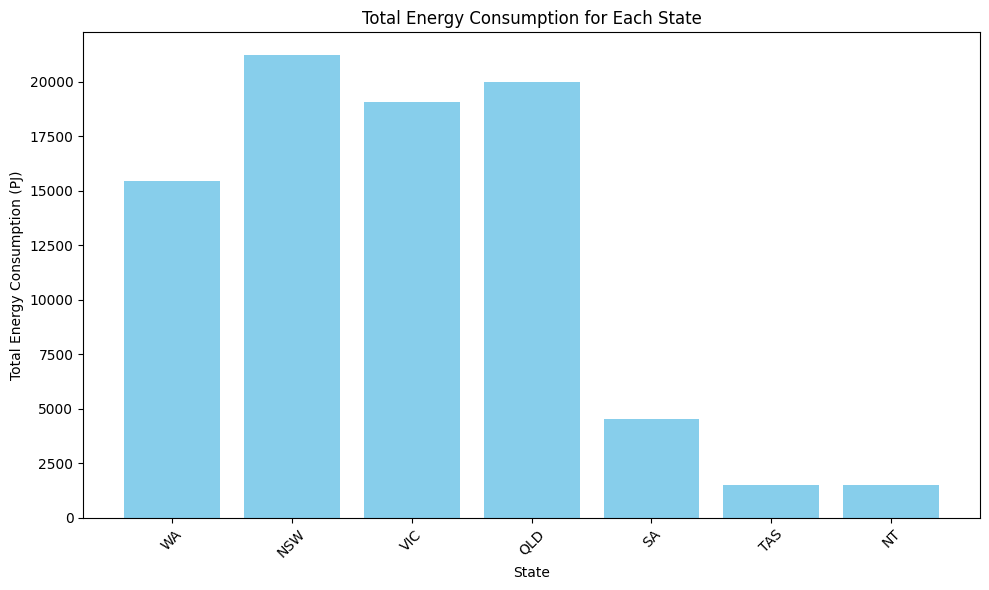

In [18]:
import matplotlib.pyplot as plt

# Extract state and the corresponding energy consumption
states = list(total_energy_consumption_by_state.keys())
total_consumption = list(total_energy_consumption_by_state.values())

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(states, total_consumption, color='skyblue')

# Add head and tags
plt.title('Total Energy Consumption for Each State')
plt.xlabel('State')
plt.ylabel('Total Energy Consumption (PJ)')

# Display bar chart
plt.xticks(rotation=45)  # rotate x axis tags
plt.tight_layout()  # adjust layout automatically to avoid overlapping
plt.show()

## Observation:


With the states represented on the x-axis and the total energy consumption in petajoules (PJ) on the y-axis, the bar chart illustrates the total energy consumption for each Australian state and territory. New South Wales (NSW) has the tallest bar on the chart, showing the state consumes the most energy overall. Victoria (VIC) and Queensland (QLD), which show somewhat lower levels of energy usage, come after NSW. On the other hand, as indicated by its shortest bar on the chart, Tasmania (TAS) has the lowest energy use. This graphic illustrates the differences in energy use amongst the states of Australia, with TAS consuming the least energy and NSW consuming the most.

#Group A:problem 02

#Problem Statement:
#Compute and visualize the total energy consumption by fuel type.

For this problem, first we need to Compute the total energy consumption by fuel type then visualize the total energy consumption by fuel type by a pie chart

In [25]:
import pandas as pd


fuel_type_totals = AUS_energy_df[['Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)', 'Renewables (PJ)']].sum()
# Grouping the data by fuel type and sum the energy consumption for each fuel type

fuel_type_table = pd.DataFrame(fuel_type_totals, columns=['Total Energy Consumption'])
# Creating a DataFrame to store the total energy consumption by fuel type

fuel_type_table.index.name = 'Fuel Type'
# Renaming the index to represent the fuel types

print(fuel_type_table) # Display the resulting table


                 Total Energy Consumption
Fuel Type                                
Coal (PJ)                         26946.9
Oil (PJ)                          31130.0
Gas (PJ)                          20049.6
Renewables (PJ)                    5054.9


##Observation:

We have calculated Total energy consumption by fuel type:
1. Coal (PJ)                         26946.9
2. Oil (PJ)                          31130.0
3. Gas (PJ)                          20049.6
4. Renewables (PJ)                    5054.9

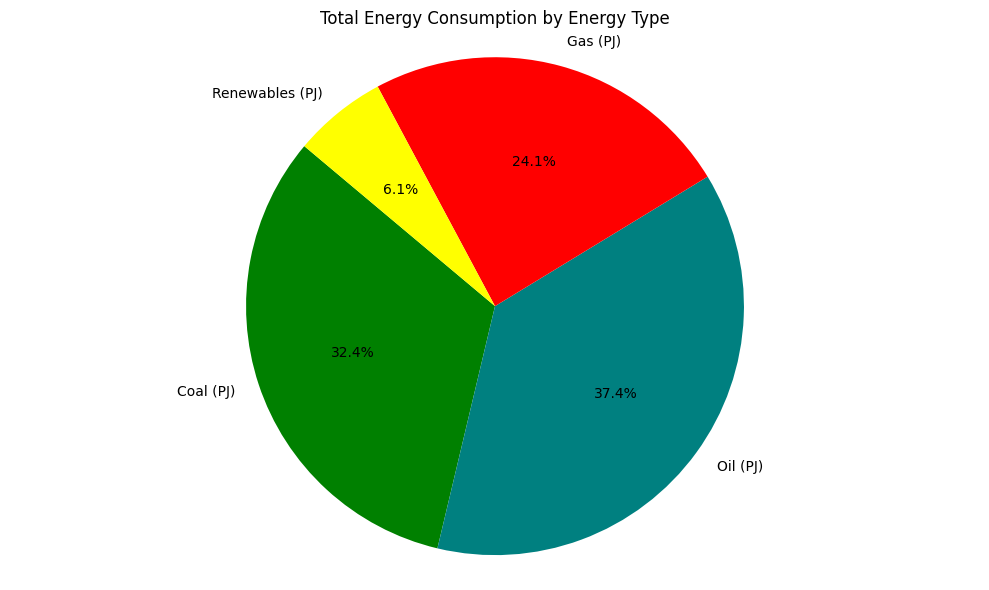

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming AUS_energy_df is your DataFrame containing energy data
# Group the data by fuel type and sum the energy consumption for each fuel type
fuel_type_totals = AUS_energy_df[['Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)', 'Renewables (PJ)']].sum()

plt.figure(figsize=(10, 6))
# Plot the total energy consumption for each fuel type as a pie chart
fuel_type_totals.plot(kind='pie', colors=['green', 'teal', 'red', 'yellow'], autopct='%1.1f%%', startangle=140)

plt.title('Total Energy Consumption by Energy Type')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.tight_layout()
plt.show()

# Observation:
The Pie Chart displays the distribution of overall energy use by fuel type, expressed as a percentage of total energy consumption. With the highest percentage of 37.4% and a total energy consumption of 31130.0 petajoules (PJ), oil is the main contributor. Coal follows closely after, making up 32.4% of the total energy consumed, or 26946.9 PJ. Gas is the least efficient energy source, accounting for 24.1% of total energy used (or 20049.6 PJ). With a value of 5054.9 PJ, renewable energy sources, on the other hand, account for the smallest portion of overall energy consumption—just 6.1%. Remarkably, oil is the fuel type that uses the most energy, whilst renewables have the lowest energy use. This discrepancy highlights both the growing importance of renewable energy sources in the overall energy mix and the dominance of conventional fossil fuels like coal and oil in the energy landscape.


#Group B Question 6